In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
startup=pd.read_csv("E:/Userfiles/Desktop/Python/Assignment 1/50_Startups.csv")
startup

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
startup.info()
startup.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [4]:
startup =startup.rename({'R&D Spend':'RnD_Spend', 'Marketing Spend':'Marketing_Spend'}, axis = 1)
startup  

,RnD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


<AxesSubplot:>

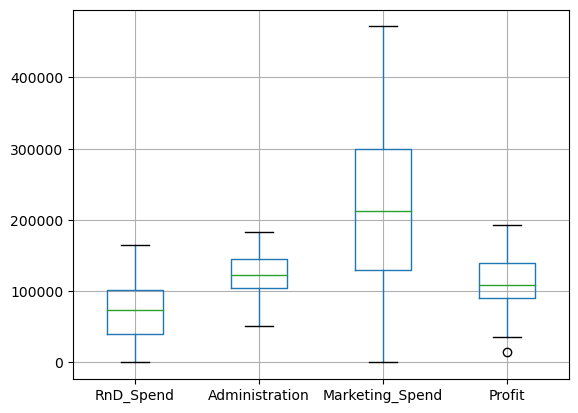

In [5]:
startup.boxplot()

In [6]:
startup.corr()

,RnD_Spend,Administration,Marketing_Spend,Profit
RnD_Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [7]:
Model = smf.ols('Profit~RnD_Spend+Administration+Marketing_Spend',data = startup).fit()
Model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Fri, 06 Jan 2023   Prob (F-statistic):           4.53e-30
Time:                        09:49:10   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RnD_Spend           0.8057      0.045     17.846      0.000       0.715       0.897
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing_Spend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
rsq_RnD_Spend = smf.ols('RnD_Spend~Administration+Marketing_Spend',data=startup).fit().rsquared  
vif_RnD_Spend = 1/(1-rsq_RnD_Spend) 

rsq_Administration = smf.ols('Administration~RnD_Spend+Marketing_Spend',data=startup).fit().rsquared  
vif_Administration = 1/(1-rsq_Administration) 

rsq_Marketing_Spend = smf.ols('Marketing_Spend~RnD_Spend+Administration',data=startup).fit().rsquared  
vif_Marketing_Spend = 1/(1-rsq_Marketing_Spend) 



# Storing vif values in a data frame
d1 = {'Variables':['RnD_Spend','Administration','Marketing_Spend'],'VIF':[vif_RnD_Spend,vif_Administration,vif_Marketing_Spend]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,RnD_Spend,2.468903
1,Administration,1.175091
2,Marketing_Spend,2.326773


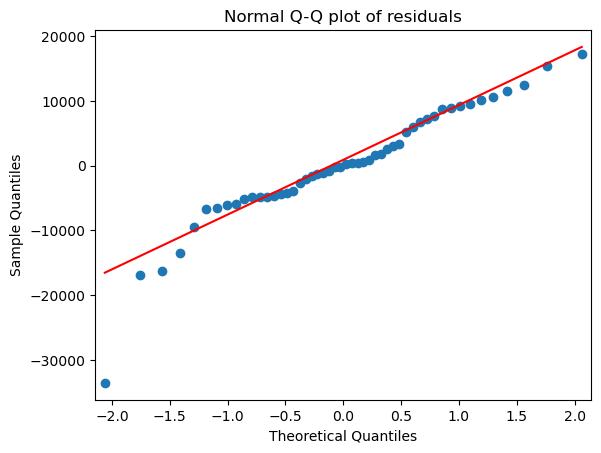

In [9]:
import statsmodels.api as sm
sm.qqplot(Model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [21]:
(b,_)=Model.get_influence().cooks_distance
b

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

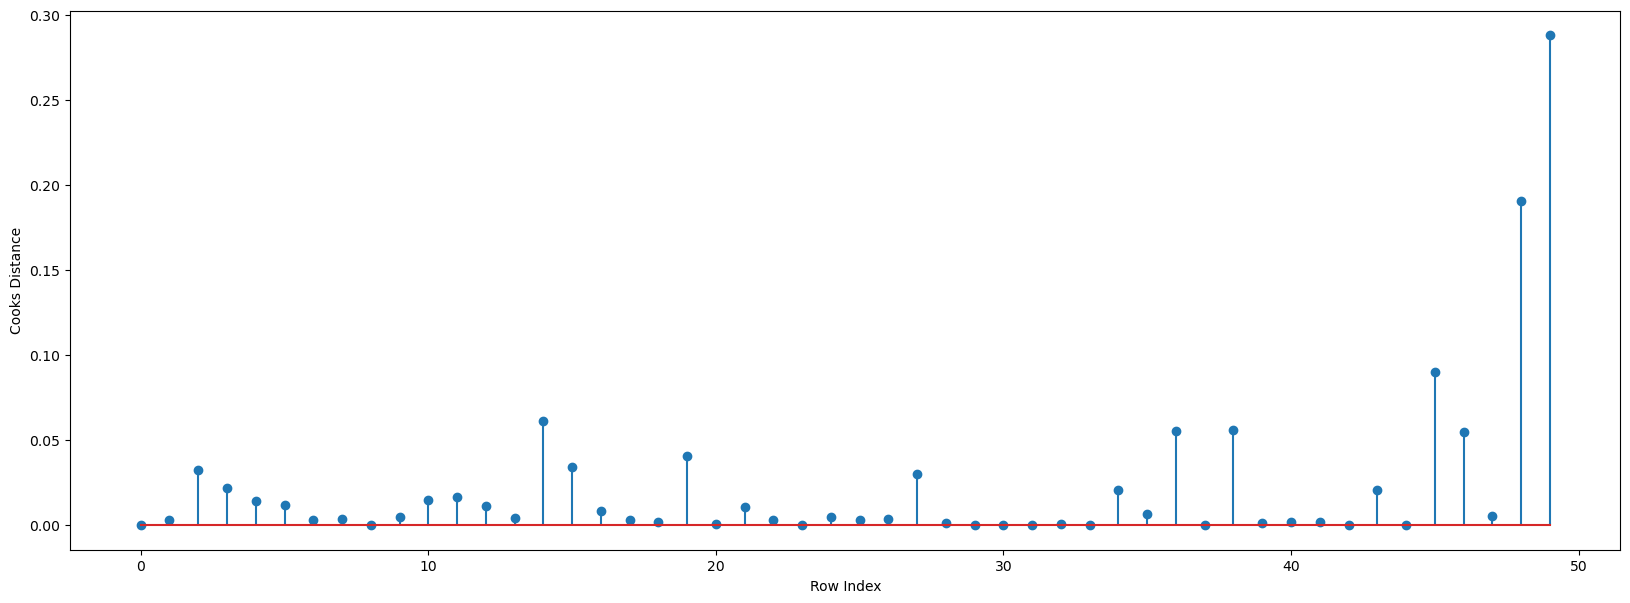

In [22]:
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(startup)),np.round(b,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [31]:
np.argmax(b) , np.max(b)

(49, 0.2880822927543263)

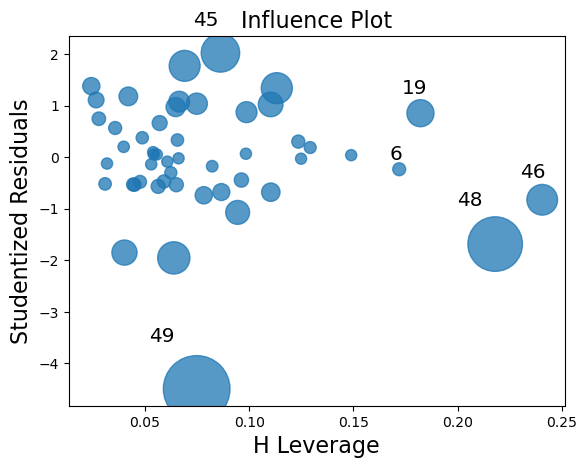

In [13]:
influence_plot(Model)
plt.show()

In [14]:
data2=startup.drop(startup.index[[49]],axis=0).reset_index(drop=True)
data2

,RnD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [16]:
new_data=pd.DataFrame({'RnD_Spend':7000,"Administration":9000,"Marketing_Spend":14000},index=[0])
new_data

,RnD_Spend,Administration,Marketing_Spend
0,7000,9000,14000


In [17]:
pred_y=model2.predict(new_data)
pred_y

0    58016.910801
dtype: float64

In [18]:
d2={'Prep_Models':['Model','model2'],'Rsquared':[Model.rsquared,model2.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,Model,0.950746
1,model2,0.961316
